## Chapter 01

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from scipy.fft import fft
np.random.seed(0)  # for reproducibility


### Exercise 1

- Consider as the seasonal component the periodic signal with period 12
```python
time = np.arange(144)
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20
```
- Use `seasonal_12` and the `trend` and `residual` components below to define and plot the additive and the multiplicative models
```python
trend = time * 2.65 + 100
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))
```
- Perform the seasonal decomposition with `seasonal_decompose` and `STL` on the new signals and compare the results with the ones obtained in class, where we used an approximate period.

seasonal decomposition of additive model


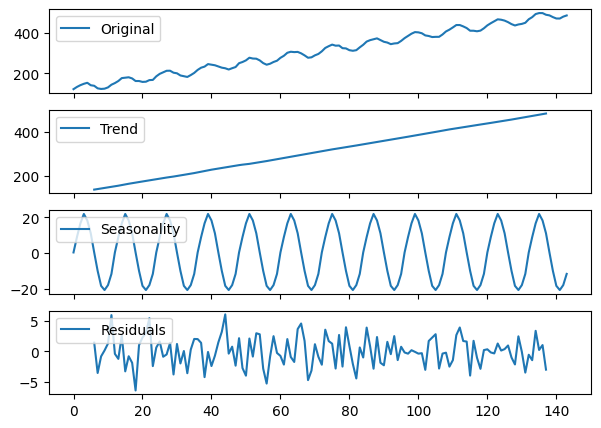

stl decomposition of additive model


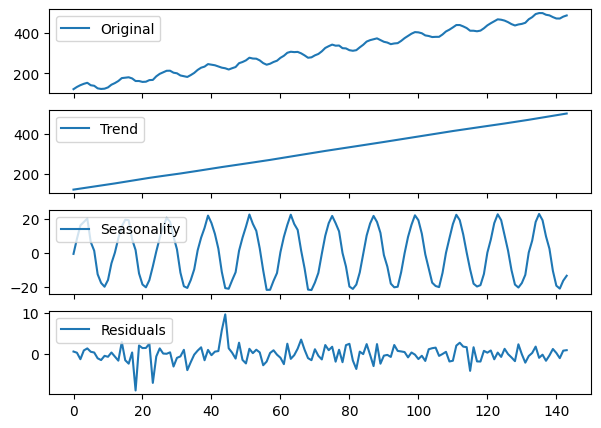

seasonal decomposition of multiplicative model, shifted to only positive non-zero values


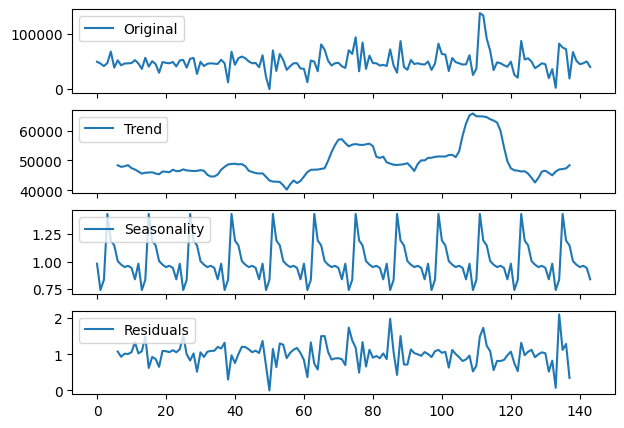

stl decomposition of multiplicative model


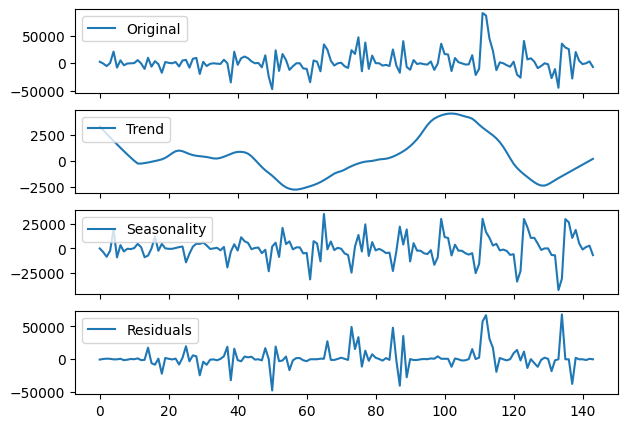

In [19]:
#defining the functions as above
time = np.arange(144)
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20
trend = time * 2.65 + 100
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))

#using the function defined in chapter 01 to plot the results
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()

#define additive and multiplicative model
additive_12 = trend + seasonal_12 + residuals
multiplicative_12 = trend * seasonal_12 * residuals

#seasonal decompose
seas_decomp_12_additive = seasonal_decompose(x=additive_12, model="additive", period=12)
#seasonal decompose gave me a value error for the multiplicative model, so I shifted it to only positive values
multiplicative_12_shifted = multiplicative_12 + (-np.min(multiplicative_12)+1)
seas_decomp_12_mult = seasonal_decompose(x=multiplicative_12_shifted, model="multiplicative", period=12)

#STL 
stl_decomp_12_additive = STL(endog=additive_12, period=12, robust=True).fit()
stl_decomp_12_mult = STL(endog=multiplicative_12, period=12, robust=True).fit()

#plot the results
print("seasonal decomposition of additive model")
seas_decomp_plots(additive_12, seas_decomp_12_additive)
print("stl decomposition of additive model")
seas_decomp_plots(additive_12, stl_decomp_12_additive)
print("seasonal decomposition of multiplicative model, shifted to only positive non-zero values")
seas_decomp_plots(multiplicative_12_shifted, seas_decomp_12_mult)
print("stl decomposition of multiplicative model")
seas_decomp_plots(multiplicative_12, stl_decomp_12_mult)

The decompostions look pretty good for the additive model, both seasonal decompostion and stl. With the new obtained period the result looks much better, there is a really good linear trend visible and the seasonality looks really good as well. There is just a little bit of noise left, much less than with the approximate period. 

The multiplicative model looks really bad though. I think this is because the noise has a very strong effect as I am multiplying it with the rest of the signal. (This also makes the signal look very different for each run with new randomly generated noise!) The seasonal decompostion doesn`t seem to work for negative or zero values, so I shifted it above the x-axis to see how it performs else. But it does not pick up any real trend, and the seasonality looks like noise. 

### Exercise 2
Load the two different time series as follows.

In [21]:
ts_A = sm.datasets.get_rdataset("AirPassengers", "datasets").data["value"].values
print(len(ts_A))
ts_B = sm.datasets.get_rdataset("CO2", "datasets").data["value"].values
print(len(ts_B))

144
468


- Plot the two time series.
- Determine if the time series looks additive or multiplicative models.
- Determine the main period of the seasonal component in the two time series.

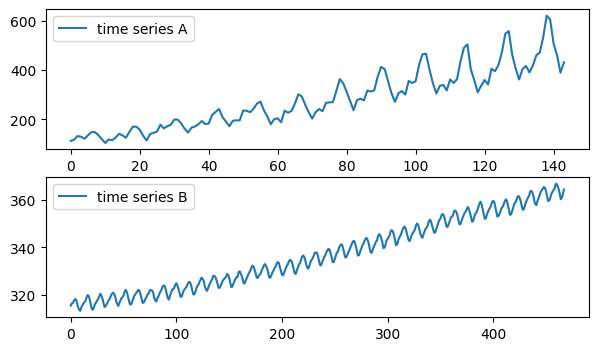

In [25]:
fig, axs = plt.subplots(2,1, figsize=(7,4))
axs[0].plot(ts_A, label="time series A")
axs[0].legend()
axs[1].plot(ts_B, label="time series B")
axs[1].legend()
plt.show()

Timeseries A looks multiplicative, or at least partly, as the amplitude increases with time. But it looks like the trend and the noise are additive, as the signal is still clearly visible and the noise is not dominant as in the multiplicative model I tried to decompose before.

Timeseries B looks additive as the amplitude is constant and a linear trend is clearly visible.

In [26]:
#use function fft_analysis(signal) from the notebook
def fft_analysis(signal):
    
    # Linear detrending
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept 
    detrended = signal - trend 
    
    fft_values = fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))

    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]

    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    print(f"Dominant Frequency: {dominant_frequency:.3f}")

    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    print(f"Dominant Period: {dominant_period:.2f} time units")
    
    return dominant_period, positive_frequencies, magnitudes

print("model A")
period_A, freq_A, magn_A = fft_analysis(ts_A)
print("model B")
period_B, freq_B, magn_B = fft_analysis(ts_B)

model A
Dominant Frequency: 0.083
Dominant Period: 12.00 time units
model B
Dominant Frequency: 0.083
Dominant Period: 12.00 time units


### Exercise 3
- Decompose `ts_A` and `ts_B` using `seasonal_decompose` and `STL`.
- Comment on the results you obtain.
from statsmodels.tsa.seasonal import seasonal_decompose, STL

seasonal for A as mult. model,
trend not exactly linear but seasonality is very jagged but cst amplitude which is good


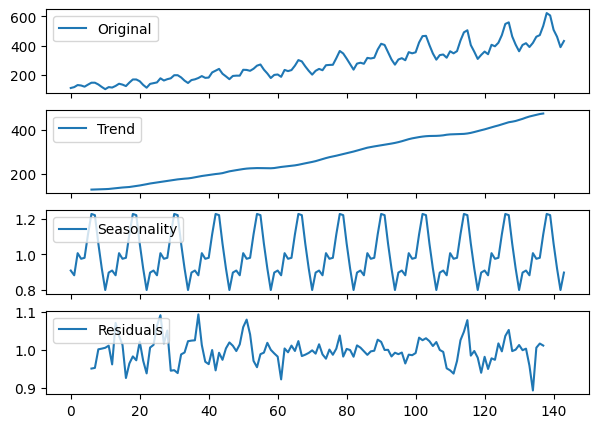

stl for A, trend same as above but amplitude in seasonality increases, so it is worse than before


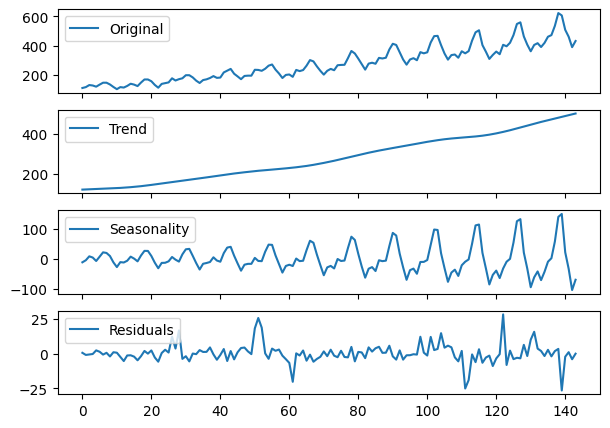

seasonal for B, additive model. Looks pretty reasonable with nice seasonality and residuals


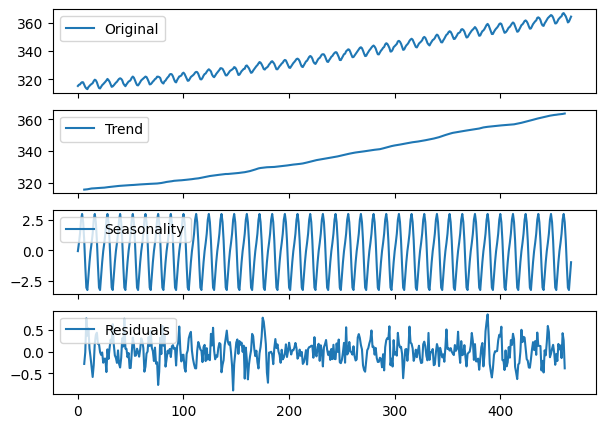

stl for B, looks similar to seasonal.


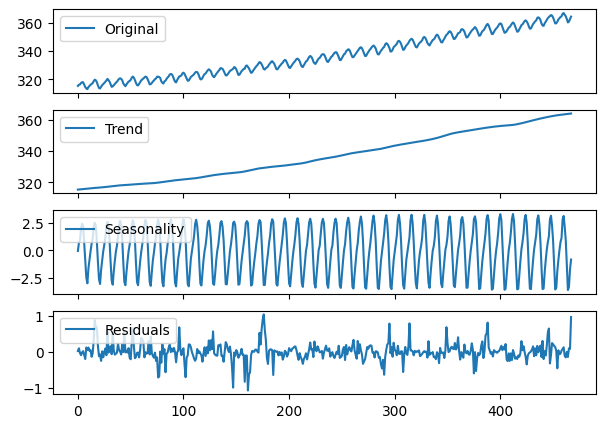

In [28]:
seas_decomp_A = seasonal_decompose(x=ts_A, model="multiplicative", period=12)
stl_decomp_A = STL(endog=ts_A, period=12, robust=True).fit()
seas_decomp_B = seasonal_decompose(x=ts_B, model="additive", period=12)
stl_decomp_B = STL(endog=ts_B, period=12, robust=True).fit()

print("seasonal for A as mult. model,")
print("trend not exactly linear but seasonality is very jagged but cst amplitude which is good")
seas_decomp_plots(ts_A, seas_decomp_A)
print("stl for A, trend same as above but amplitude in seasonality increases, so it is worse than before")
seas_decomp_plots(ts_A, stl_decomp_A)
print("seasonal for B, additive model. Looks pretty reasonable with nice seasonality and residuals")
seas_decomp_plots(ts_B, seas_decomp_B)
print("stl for B, looks similar to seasonal.")
seas_decomp_plots(ts_B, stl_decomp_B)

Again the decompositions works better for the model that already looked additive (it probably is), see plot 3 and 4. There the trend is not perfectly linear, the line is a bit wobbly and in the stl decomposition the seasonality seems to have a slightly increasing amplitude. But overall the results seem reasonable. 

The decomposition is more chaotic for time series A. The decompositions both pick up some trend, but it is not exactly linear. We also get some seasonality, but there is a lot of noise left. Especially that the amplitude is still increasing in the stl decomposition is not really good.

## Chapter 02

In [29]:
# Imports
import warnings
warnings.filterwarnings('ignore')
from io import BytesIO
import requests
import pandas as pd
from scipy.integrate import quad
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller


### Exercise 1

- Load the two time series `stationarity_ts1` and `stationarity_ts2` by running the code below.

In [30]:
# Load the first time series
response = requests.get("https://zenodo.org/records/10897398/files/stationarity_ts1.npy?download=1")
response.raise_for_status()
stationarity_ts1 = np.load(BytesIO(response.content))
print(len(stationarity_ts1))

# Load the second time series
response = requests.get("https://zenodo.org/records/10897398/files/stationarity_ts2.npy?download=1")
response.raise_for_status()
stationarity_ts2 = np.load(BytesIO(response.content))
print(len(stationarity_ts2))

100
100


1. Plot the two time series with a run sequence plot.
4. Based on the plot, discuss if each time series seems to be stationary or not.

<Axes: title={'center': 'timeseries 2'}, xlabel='Time', ylabel='Values'>

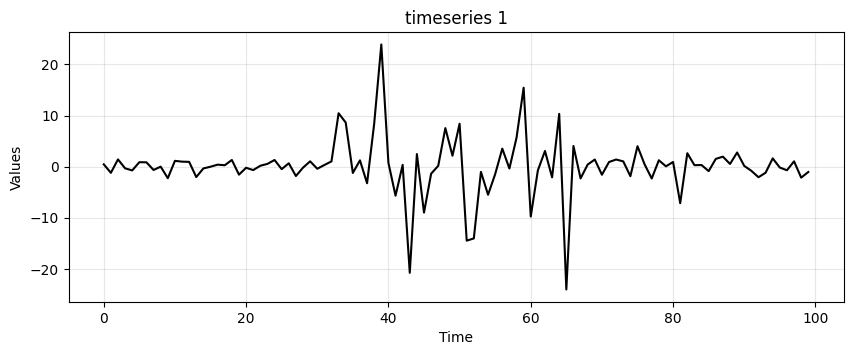

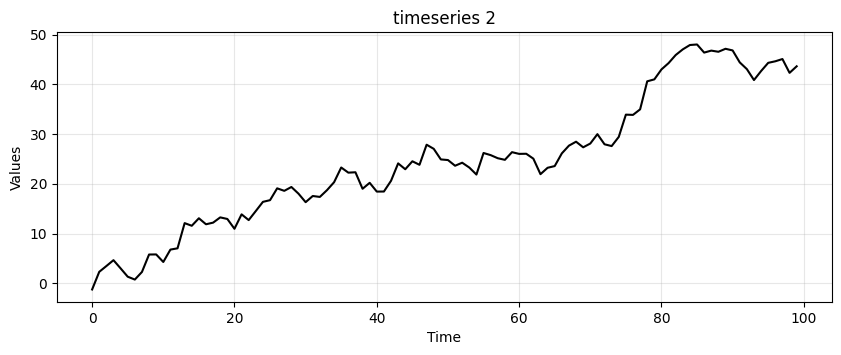

In [32]:
#plotting function from the course notebook
def run_sequence_plot(x, y, title, xlabel="Time", ylabel="Values", ax=None):
    if ax is None:
        _, ax = plt.subplots(1,1, figsize=(10, 3.5))
    ax.plot(x, y, 'k-')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(alpha=0.3)
    return ax
T = 200
time = np.arange(T)

run_sequence_plot(time[:-100], stationarity_ts1, "timeseries 1")
run_sequence_plot(time[:-100], stationarity_ts2, "timeseries 2")

Time series 1: the mean seems constant, but variance is probably not the same for all possible chunks of the series. In the middle variance looks like it is larger than in the beginning and end of the series. 

Time series 2: has a clear trend,but the mean doesnt seem to be constant everywhere. Also it looks correlated, there is probably a path dependence. (Series 2 looks like the random walk example)

### Exercise 2

Use the following tools to determine if the time series `stationarity_ts1` and `stationarity_ts2` are stationary or not.

1. Summary statistics on the chunks.
2. Augmented Dickey-Fuller test.

Discuss the result obtained with each method.

In [ ]:
#1
chunks_ts1 = np.split(stationarity_ts1, indices_or_sections=10)
chunks_ts2 = np.split(stationarity_ts2, indices_or_sections=10)
print("ts 1")
print("{}\t | {}\t\t | {}".format("Chunk", "Mean", "Variance"))
print("-" * 35)
for i, chunk in enumerate(chunks_ts1, 1):
    print("{:2}\t | {:.5}\t | {:.5}".format(i, np.mean(chunk), np.var(chunk)))
    print("ts 2")
print("{}\t | {}\t\t | {}".format("Chunk", "Mean", "Variance"))
print("-" * 35)
for i, chunk in enumerate(chunks_ts2, 1):
    print("{:2}\t | {:.5}\t | {:.5}".format(i, np.mean(chunk), np.var(chunk)))

Chunk ts1	 | Mean		 | Variance
-----------------------------------
 1	 | -0.14368	 | 1.1065
 2	 | 0.12109	 | 1.1652
 3	 | 0.047148	 | 0.76635
 4	 | 4.9208	 | 59.92
 5	 | -2.3263	 | 55.947
 6	 | -0.37065	 | 79.168
 7	 | -1.9508	 | 77.816
 8	 | 0.34635	 | 3.1884
 9	 | 0.30483	 | 7.293
10	 | -0.51908	 | 1.3469
Chunk ts2	 | Mean		 | Variance
-----------------------------------
 1	 | 2.8186	 | 4.5026
 2	 | 10.511	 | 9.3034
 3	 | 16.023	 | 7.5191
 4	 | 19.733	 | 4.9789
 5	 | 23.268	 | 9.4271
 6	 | 24.608	 | 1.7717
 7	 | 25.543	 | 3.9608
 8	 | 32.736	 | 22.713
 9	 | 46.289	 | 2.2247
10	 | 43.773	 | 2.4782
